In [18]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Assignment 1

In [17]:
#Sourcing the first dataframe 
df = pd.read_csv("/Users/lestersoers/Documents/Steps.csv", sep=";")

#Replacing NaN-values in the frame with the code:
df = df.fillna(0)
df.describe()

,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,04-05-2014,05-05-2014,06-05-2014,07-05-2014,08-05-2014,09-05-2014,10-05-2014,11-05-2014,12-05-2014,13-05-2014
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,...,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.0
mean,465.000000,94.099031,2363.227126,3258.685684,2358.711518,3090.496233,3302.320775,2952.554360,3379.469322,4163.566200,...,756.442411,579.158235,508.418730,594.968784,380.274489,731.452099,704.926803,593.412271,533.223897,0.0
std,268.323499,849.309766,5148.525494,6056.212149,5130.559226,5197.950106,5168.514440,5262.226998,4915.096148,5804.302152,...,3174.031586,2562.608887,2343.635586,2876.641763,2353.715160,3233.101267,2769.277979,3139.909396,2296.391424,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,465.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,697.000000,0.000000,383.000000,4871.000000,2465.000000,5712.000000,6345.000000,4944.000000,6429.000000,8267.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,929.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,0.0


In [4]:
#sourcing second dataframe 'Survey'
df1 = pd.read_csv("/Users/lestersoers/Documents/Survey.csv", sep=",")
#Using the Pandas function below to fill all the Nan-values with 0's
df1 = df1.fillna(0)
df1

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [14]:
df2 = pd.merge(df, df1, on="id")
print(df2)

      id  20-06-2013  21-06-2013  22-06-2013  23-06-2013  24-06-2013  \
0      1         0.0         0.0         0.0         0.0      3941.0   
1      2         0.0         0.0     10473.0       705.0      4287.0   
2      3         0.0     11428.0     12523.0      2553.0       190.0   
3      4         0.0         0.0         0.0         0.0         0.0   
4      5         0.0         0.0         0.0         0.0         0.0   
..   ...         ...         ...         ...         ...         ...   
924  925         0.0      4571.0     10471.0      5899.0     15295.0   
925  926         0.0         0.0         0.0         0.0         0.0   
926  927         0.0         0.0         0.0      1623.0         0.0   
927  928         0.0         0.0     14411.0     14364.0     26629.0   
928  929         0.0      3324.0      4507.0     14364.0      4098.0   

     25-06-2013  26-06-2013  27-06-2013  28-06-2013  ...  12-05-2014  \
0       15733.0      9929.0     12879.0     10541.0  ...       

In [28]:
#first method used was: df2 = pd.get_dummies(df2)
#did not work correctly
#Using the other method from python called .apply.
#'Coerce' added to prevent any python apply-related errors.
# Python would normally generate
df2['weight'] = df2['weight'].apply(pd.to_numeric, errors='coerce')
df2['weight'] = df2['weight'].apply(pd.to_numeric, errors='coerce')


# Function that removes values below 30KG as well as above 200KG. Above 200KG is seen here as 'untrue'
def weight_func(x):
    if x < 30 or x > 200:
        return float('NaN')
    else:
        return x

df2['weight'] = df2['weight'].apply(weight_func)
df2.head()
#The _X after the class is needed because for some reason it adds duplicates to my dataframe. Possible cause is running the code more than once!

,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,13-05-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


In [23]:
#calculating the mean amount of steps of the dataframe calculated over all the day/time related columns.
df2["mean_steps"] = df.loc[:, "20-06-2013":"13-05-2014":1].mean(axis=1)
df2.head()

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1180: UserWarning: Parsing '20-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)
/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1180: UserWarning: Parsing '13-05-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)


,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,13-05-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


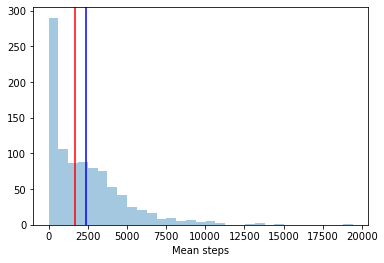

The mean is 2363.5867606132983
The median is 1697.4268292682927
The variance is 5914602.901343754


In [24]:
#Calculating the mean, median and variance in regard to step
median_steps = df2["mean_steps"].median()
mean_steps = df2["mean_steps"].mean()
variance_steps = df2["mean_steps"].var()

#visualizing the results with the use of a distplot
plt.axvline(median_steps, 0, 100, color='red', label='median')
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')

sns.distplot(df2["mean_steps"], kde=False)
plt.xlabel("Mean steps")
plt.show()
print("The mean is " + str(mean_steps))
print("The median is " + str(median_steps))
print("The variance is " + str(variance_steps))

mean (average) steps is 2364. The median (most common) is 1697 steps and the value that resembles the variace is 5914602, which is a high number that translates to the data being spread out from eachother.

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


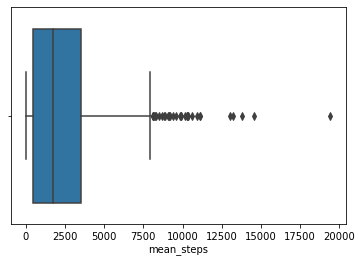

In [26]:
#visualizing the rows in 'mean_steps'
sns.boxplot(df2["mean_steps"])
plt.show()

The graph shows that the data in the frame is mostly clustered around the left side of the tail whilst the right side has a longer length.

Based on the visual and knowing the charactaristics of the frame i conclude that the dataframe has what we call a right-skewed distribution. The fact that there are many outliers to be seen further proofs that the data is skewed.

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='weight'>

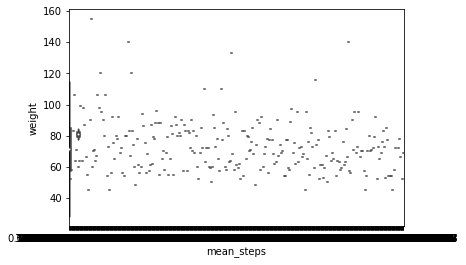

In [29]:
#Creating a violinplot with the columns that contain the mean value of steps and the age <25
sns.violinplot(df2["mean_steps"], df2["weight"])

In [ ]:
#Data does not correlate well with eachother. trying again below.

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='gender'>

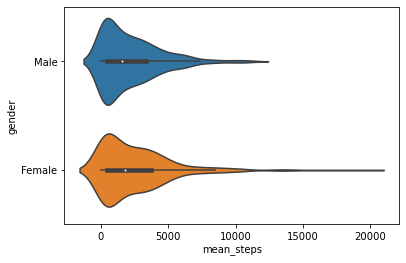

In [30]:
sns.violinplot(df2["mean_steps"], df2["gender"])

In [ ]:
Woman ('female') on average walk more than men. Based on the visual, almost twice the amount.

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='education_1'>

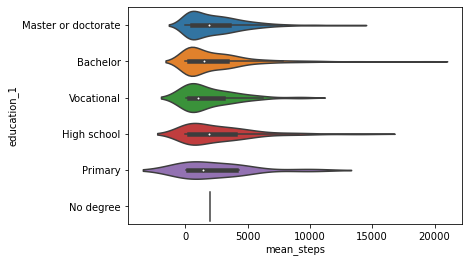

In [32]:
#using multiple classes within 2 columns
sns.violinplot(df2["mean_steps"], df2["education_1"])

People who possess a bachelor degree walk the most. 'Vocational' walks the least. 

/Users/lestersoers/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='age'>

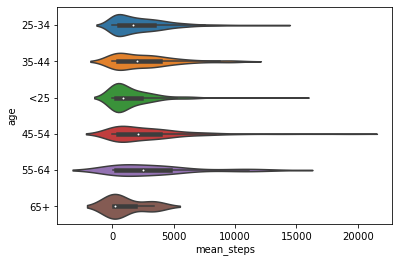

In [33]:
sns.violinplot(df2["mean_steps"], df2["age"])

Most mean steps value belongs to 45-54. They walk the most. Lowest is 65+ which makes sense from a personal point of view. 

# Assignment 2

## Applying correlation tests to the Fitbit dataset

<AxesSubplot:xlabel='weight', ylabel='mean_steps'>

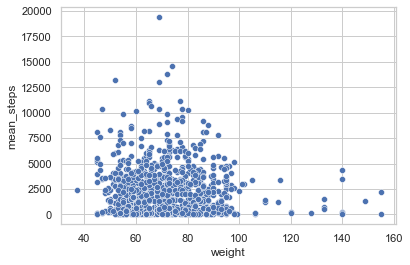

In [35]:
#First using the numerical values within columns
sns.set(style="whitegrid")
sns.scatterplot(x=df2["weight"],
                y=df2["mean_steps"],
                data=df2)

<AxesSubplot:xlabel='mean_steps', ylabel='height'>

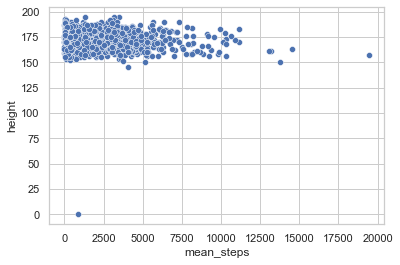

In [36]:
sns.set(style="whitegrid")
sns.scatterplot(x=df2["mean_steps"],
                y=df2["height"],
                data=df2)

<AxesSubplot:xlabel='hh_size', ylabel='mean_steps'>

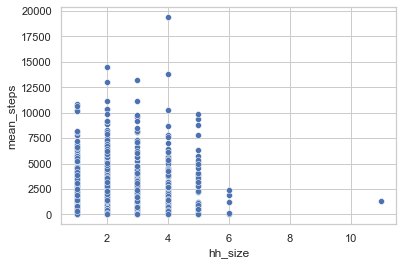

In [37]:
sns.set(style="whitegrid")
sns.scatterplot(x=df2["hh_size"],
                y=df2["mean_steps"],
                data=df2)

In [38]:
#adding a numerical correlation test (as done in the final assigment)
num = df2[["height", "weight", "hh_size", "mean_steps"]]
num.corr()

#this tests shows the significance in correlation between valuebles in numbers.

,height,weight,hh_size,mean_steps
height,1.000000,0.454078,-0.031736,-0.063318
weight,0.454078,1.000000,0.006322,-0.084576
hh_size,-0.031736,0.006322,1.000000,0.044081
mean_steps,-0.063318,-0.084576,0.044081,1.000000


Based on the correlation matrix i'd conclude that only weight & height have a correlation. The other variables are too low or close to 0.0(0) which means there is also no negative correlation.

# Assignment 3

Applying correlation and Linear Regression methods to the dataset we created in assignment 1 & 2.

Linear Regression is a statistic prediction model that predicts (try to determine) the significance of a relation between two variables.

In [39]:
#Creating dummy data with the function i showed before (but didnt work then)
fictive = df2[["gender", "age", "education_1"]]
fake = pd.get_dummies(fictive)
fake.head(10)


,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,1,0,1,0,0,0,0,0,0,0,1,0,0,0


All the categorical data are now also presentated as 0's, the way this algorithm needs it to be.

In [43]:
X = fake
y = df2["mean_steps"]

lm = LinearRegression()  #This creates the model
lm.fit(X, y)  #fits the data into the model

b0 = lm.intercept_  #sourcing a list of coefficients (excluding the the value equal to the intercept)
b1 = lm.coef_[0]  #actually does get the intercept value

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")  #.0f formats to 2 decimals.

The regression line is equal to y = 2012.96 + 127.57X


In [44]:
df2["mean_steps_p"] = lm.predict(X)  #Using pythons .predict function to create prediction values, which we save to the dataframe
df2.head(25)

,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,mean_steps_p
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,2183.106444
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,2523.919980
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,2183.106444
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,1385.053676
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,2391.120243
5,6,0.0,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Lille,Male,35-44,1,1,Vocational,170.0,63.0,5554.884146,1857.019270
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,790.692073,2183.106444
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,635.533537,2438.241343
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,35-44,4,4,Vocational,172.0,69.0,2972.006098,2112.154168
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1964.0,...,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,265.554878,2438.241343


In [45]:
df2["resid"] = df2["mean_steps"] - df2["mean_steps_p"]
df2.head(5)

,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,gender,age,hh_size,education,education_1,height,weight,mean_steps,mean_steps_p,resid
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,2183.106444,2950.768556
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,2523.919980,302.451971
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,2183.106444,1562.795995
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,1385.053676,-1163.517091
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,2391.120243,-1516.562316


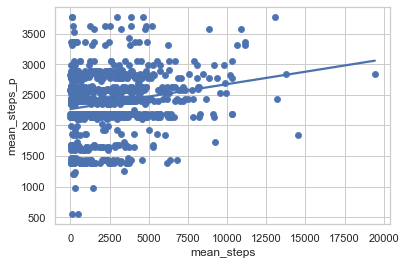

In [47]:
residual = df2['mean_steps_p'] - df2['mean_steps']  ##y-y equals (y' = prediction)  ubtracting Y'-Y (Y' = predicted) ##calculates the residual value
sns.scatterplot(x='mean_steps', y='mean_steps_p', data=df2)
sns.regplot(x='mean_steps', y='mean_steps_p', data=df2, ci=None)
plt.show()

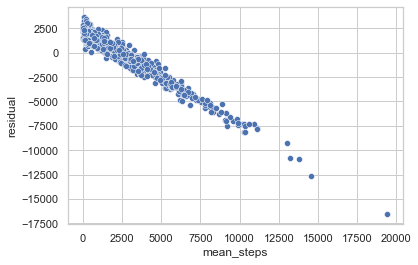

In [48]:
df2['residual'] = df2['mean_steps_p'] - df2['mean_steps']
sns.scatterplot(x='mean_steps', y='residual', data=df2)
plt.show()

The scatterplot above shows a very strong negative relation between the two values. As one decreases, the other increases and vice versa.

In [51]:
r2_score(df2['mean_steps'], df2['mean_steps_p'])

0.040651029412714035

the R2-score (R^2) shows us that we can predict 0,4% of the variation of the mean steps per individual participant. 

In [53]:
math.sqrt(
    mean_squared_error(df2['mean_steps'], df2['mean_steps_p']))

#this gives the model fit (R2) for the Y and predicted Y. as in, how good fits the Linear Model to predict the dependant variable.

2380.7688634451943

On average the predictions are 2380 steps off, which is considered very bad by statistical experts. Linear Model is best used for variables that you have already estabilished a relationship between. 